In [ ]:
from google.colab import files
data_to_load=files.upload()


Saving Insurance.csv to Insurance.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


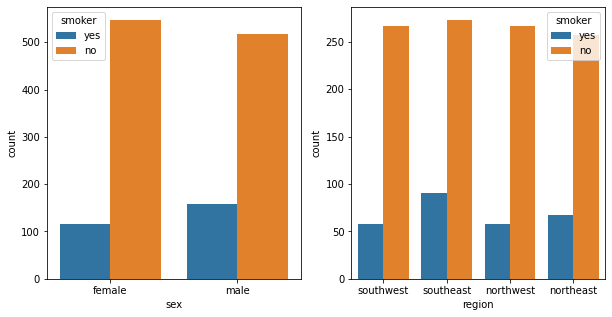

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='sex',hue='smoker',data=df,ax=ax[0])
sns.countplot(x='region',hue='smoker',data=df,ax=ax[1])

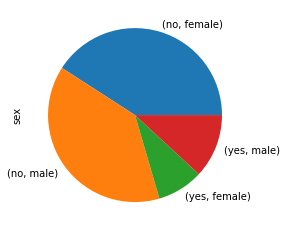

In [ ]:
df.groupby(by=['smoker','sex'])['sex'].count().plot(kind='pie')

In [ ]:
cat=df.select_dtypes(exclude=['int32','int64','float64'])
num=df.select_dtypes(include=['int32','int64','float64'])

In [ ]:
cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=cat.apply(LabelEncoder().fit_transform)
cat.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [ ]:
cat=pd.get_dummies(cat, columns=['sex', 'smoker'], drop_first=True)
cat.head()

,region,sex_1,smoker_1
0,3,0,1
1,2,1,0
2,2,1,0
3,1,1,0
4,1,1,0


In [ ]:
df=pd.concat([num,cat],axis=1)

In [ ]:
df.head()

,age,bmi,children,charges,region,sex_1,smoker_1
0,19,27.900,0,16884.92400,3,0,1
1,18,33.770,1,1725.55230,2,1,0
2,28,33.000,3,4449.46200,2,1,0
3,33,22.705,0,21984.47061,1,1,0
4,32,28.880,0,3866.85520,1,1,0


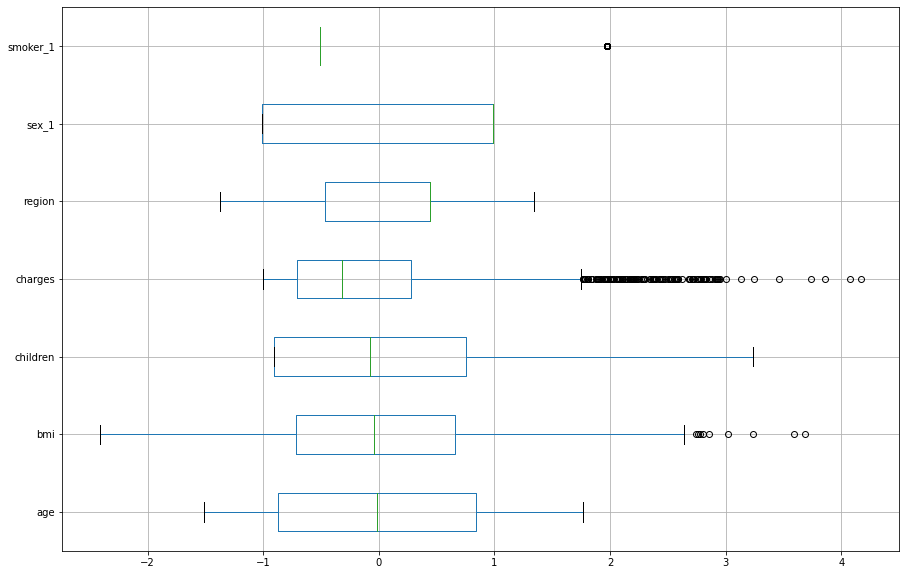

In [ ]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)

z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(15,10))

In [ ]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
df["bmi"] = np.where(df["bmi"] >= (Q3 + 1.5 * IQR), Q3, df["bmi"])
df["bmi"] = np.where(df["bmi"] <= (Q1 - 1.5 * IQR), Q1, df["bmi"])

8.3975


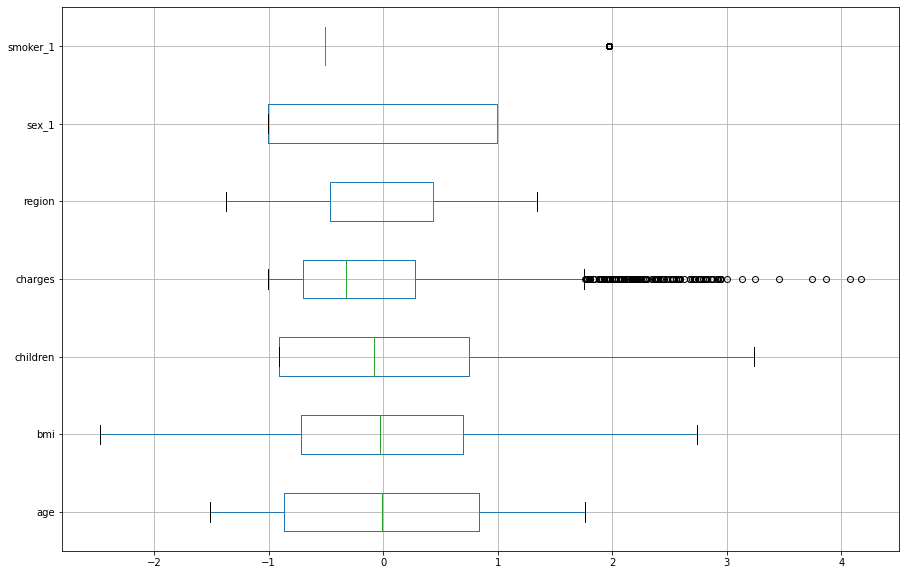

In [ ]:
#Outlier check
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df)

z=pd.DataFrame(scaler.transform(df),columns=df.columns)
z.boxplot(vert=False,figsize=(15,10))

In [ ]:
from sklearn.preprocessing import normalize
nm = normalize(df)
cols = df.columns
df1 = pd.DataFrame(nm, columns = cols)
X = df1.drop(["charges"], axis = 1)
y = df1["charges"]
X.head()

,age,bmi,children,region,sex_1,smoker_1
0,0.001125,0.001652,0.000000,0.000178,0.000000,0.000059
1,0.010429,0.019566,0.000579,0.001159,0.000579,0.000000
2,0.006293,0.007416,0.000674,0.000449,0.000225,0.000000
3,0.001501,0.001033,0.000000,0.000045,0.000045,0.000000
4,0.008275,0.007468,0.000000,0.000259,0.000259,0.000000


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0.]


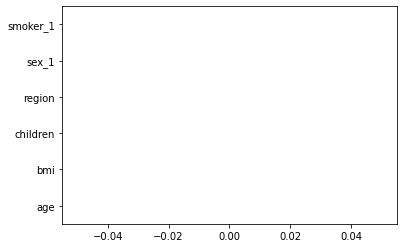

In [ ]:
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=5) 
print(x_train.shape)
print(y_train.shape)

(936, 6)
(936,)


In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
471,0.999873,0.999851
1250,0.999998,0.999988
1257,0.999986,1.000001
139,0.999810,0.999783
919,0.999956,0.999950


In [ ]:
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test)) 

Train Score:  0.9421772049322117
Test Score:  0.9499772064098044


In [ ]:
# Regression Modeling
import statsmodels.api as sm
#performing ols. from the ols result 
#we can see that sex has a p-value of 0.694
#almost 7. And we already know any variable that has 
#a p-value which is greater that 0.5 will not be useful for predicting.
#so we would drop sex
x = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              2707.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                        0.00
Time:                        10:19:50   Log-Likelihood:                         -172.71
No. Observations:                1338   AIC:                                      357.4
Df Residuals:                    1332   BIC:                                      388.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

MAE 1.2604375686966418e-05
MSE 3.5090307747398926e-10
VarScore 0.9502826338183462
R2 Score Error 0.9499772064098044


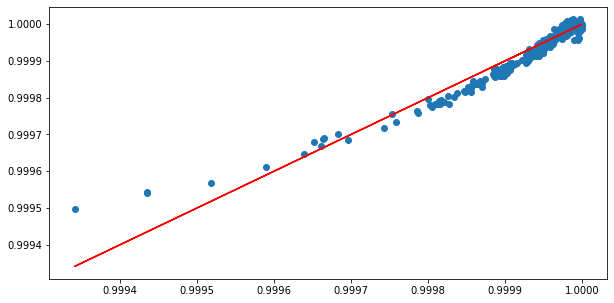

In [144]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("VarScore",metrics.explained_variance_score(y_test,y_pred))
print("R2 Score Error",r2_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [267]:
print(regressor.predict([[55,32,1,0,0,0]])*10000)

[9813.84557445]


In [219]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [240]:
model2 = Sequential()
model2.add(Dense(12, input_shape=(6,),kernel_initializer='uniform', activation='relu'))
model2.add(Dense(12, kernel_initializer='he_uniform',activation='relu'))
model2.add(Dense(1, activation='linear'))



In [247]:
model2.compile(optimizer='adam',loss='mae')

In [248]:
model2.fit(X_train, y_train,epochs=500,batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/500
30/30 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 2/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 9.9101e-04
Epoch 3/500
30/30 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 5.2761e-04
Epoch 4/500
30/30 [==============================] - 0s 1ms/step - loss: 9.1639e-04 - val_loss: 8.5256e-04
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 9.9973e-04 - val_loss: 9.7623e-04
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 9.9912e-04 - val_loss: 0.0011
Epoch 7/500
30/30 [==============================] - 0s 1ms/step - loss: 9.9521e-04 - val_loss: 0.0012
Epoch 8/500
30/30 [==============================] - 0s 1ms/step - loss: 9.9195e-04 - val_loss: 0.0013
Epoch 9/500
30/30 [==============================] - 0s 2ms/step - loss: 9.9175e-04 - val_loss: 0.0014
Epoch 10/500
30/30 [==============================] - 0s 2ms/step - l

MAE: 0.00019154807679999
MSE: 3.728422556039132e-08
RMSE: 0.0001930912363635163
VarScore: 0.9153854069785119


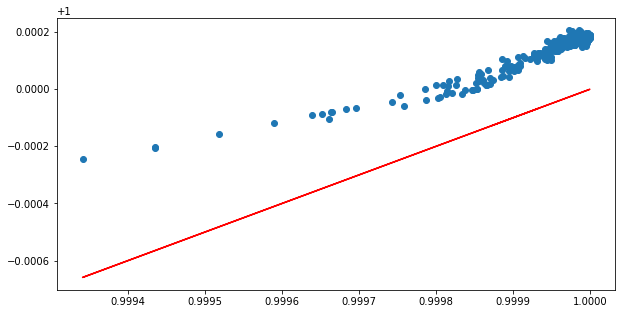

In [249]:
y_pred = model2.predict(x_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [250]:
model2.save("medical_cost")

INFO:tensorflow:Assets written to: medical_cost/assets


In [251]:
from keras.models import load_model 
model = load_model("medical_cost") 

In [257]:
input=[[60,27,2,1,1,1]]

In [258]:
prediction = model.predict(input)*10000
print(prediction)

[[8844.582]]
